In [95]:
#내가 사용 할 각종 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 최소 제곱법을 이용해 기울기 'a' 와 y절편의 값 'b'구하기.

In [2]:
#x와 y값을 임의로 설정 후 리스트에 넣음
x = [2,4,6,8]
y = [81,93,91,97]

In [8]:
#Numpy의 Mean함수를 사용, Mean은 리스트를 받아와 평균값을 구해주는 함수
mx = np.mean(x)
my = np.mean(y)
print(f'x의 평균값 : {mx}, y의 평균값 : {my}')

x의 평균값 : 5.0, y의 평균값 : 90.5


In [32]:
#기울기 공식의 분모
divisor = sum([(mx-i)**2 for i in x])

#기울기 공식의 분자를 구하는 식을 함수로 만듦
def top(x, mx , y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d

dividend = top(x,mx,y,my)

print(f'분자 : {dividend}\n     -----\n분모 : {divisor} ')

분자 : 46.0
     -----
분모 : 20.0 


In [27]:
#기울기 값 a와 y절편 구하기
a = dividend/divisor
b = my - (mx*a)

print(f'기울기 a : {a}, y절편 b :{b}')

기울기 a : 2.3, y절편 b :79.0


# 평균 제곱 오차(Mean Square Error) MSE

In [66]:
#임의로 정한 기울기 a, 임의로 정한 y절편 b의 값
fake_a_b = [3,76]

In [67]:
#       [공부한 시간, 점수]
data = [[2,81],[4,93],[6,91],[8,97]]

#x,y의 변수에 각각 data[0]의 값들, data[1]의 값들을 넣어줌
x = [i[0] for i in data]
y = [i[1] for i in data]

In [76]:
#내부 함수의 설정

#1차 방정식 y= ax+b를 나타낸것
def predict(x):
    return fake_a_b[0]*x + fake_a_b[1]

#평균 제곱 오차 공식 MSE를 파이썬 함수로 옮긴 모습.
def mse(y ,y_hat):
    return ((y-y_hat)**2).mean()

#mse함수에 데이터를 대입하여 최종 값을 구하는 함수 
def mse_val(y, predict_result):
    return mse(np.array(y), np.array(predict_result))

#예측 값이 들어갈 빈 리스트도 미리 만들어줌
predict_result = []

In [77]:
#모든 x값을 한 번씩 대입하여 그 결과에 해당하는 predict_result리스트를 완성
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print(f'공부한 시간 : {x[i]}, 실제 점수 : {y[i]}, 예측 점수 :{predict(x[i])}')
    
#def mse_val을 이용한 MSE최종값을 출력

print(f'\nMSE 최종값 : {mse_val(predict_result, y)}')

#최종값을 통해 알 수 있는것은 처음 가정한 a 3, B 76의 오차가 약 11이라는것을 알게됨.
#최종적으로 가장 좋은건 이 오차를 줄이며 새로운 선을 그어야함

공부한 시간 : 2, 실제 점수 : 81, 예측 점수 :82
공부한 시간 : 4, 실제 점수 : 93, 예측 점수 :88
공부한 시간 : 6, 실제 점수 : 91, 예측 점수 :94
공부한 시간 : 8, 실제 점수 : 97, 예측 점수 :100

MSE 최종값 : 11.0


## 오차 줄이기 , 경사하강법

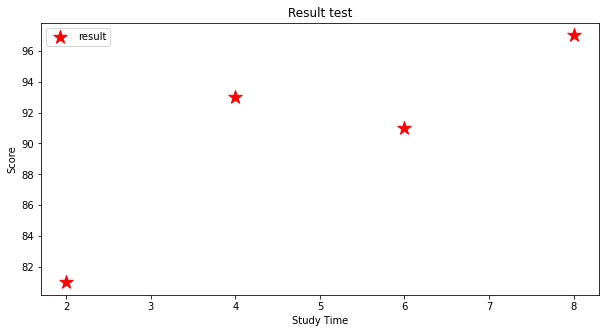

In [153]:
#막간 matploilib 사용법
plt.figure(1,figsize=(10,5))
#x는 공부한 시간, y는 점수 s = int(size), c = Color
plt.scatter(x,y,marker='*',s=200,c='red') #딱봐도 뭔지 알겠져? 그냥 점찍기, Plot은 선
plt.title('Result test') # 제목
plt.ylabel('Score') #y-lebel
plt.xlabel('Study Time') #x-label
plt.legend(['result']) #범례지정
plt.show()

In [145]:
#리스트로 되어있는 x와 y값을 넘파이 배열로 바꿈
#인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함인데
#뒤에서 자주 사용하고 헷갈림. 항상 타입을 신경써줘야함.
print(type(x))
x_data = np.array(x)
print(type(x_data))

y_data = np.array(y)

<class 'list'>
<class 'numpy.ndarray'>


In [146]:
#기울기 a와 y절편 b의 값 초기화
a = 0; b = 0

In [147]:
#학습률 Learning rate 정하기
lr = 0.03

#반복 횟수 epoch를 설정
epochs = 2001

In [148]:
#경사하강법 시작
for i in range(epochs):
    y_hat = a * x_data +b # y를 구하는 식
    error = y_data - y_hat #오차 구하는 식
    
    #여기선 Sum이 Sigma와 같은것.
    a_diff = -(2/len(x_data) * sum(x_data * (error))) #오차함수를 a로 미분한 값
    b_diff = -(2/len(x_data) * sum(error)) #오차함수를 b로 미분한 값

    a = a - lr * a_diff #학습률을 곱해 기존의 a값을 업데이트
    b = b - lr * b_diff #학습률을 곱해 기존의 b값을 업데이트
    
    if i % 100 == 0: #100번 반복될 때마다 현재의 epoch , a, b값을 출력
        #f - string {변수 : 단위설정}
        #https://zetcode.com/python/fstring/
        print(f'epoch = {i}, 기울기 = {a:.4f}, 절편 = {b}')

epoch = 0, 기울기 = 27.8400, 절편 = 5.43
epoch = 100, 기울기 = 7.0739, 절편 = 50.51166161138297
epoch = 200, 기울기 = 4.0960, 절편 = 68.28224379060177
epoch = 300, 기울기 = 2.9757, 절편 = 74.96781336233505
epoch = 400, 기울기 = 2.5542, 절편 = 77.48302865233052
epoch = 500, 기울기 = 2.3956, 절편 = 78.42929177728175
epoch = 600, 기울기 = 2.3360, 절편 = 78.78529068727728
epoch = 700, 기울기 = 2.3135, 절편 = 78.91922301600925
epoch = 800, 기울기 = 2.3051, 절편 = 78.96961044185792
epoch = 900, 기울기 = 2.3019, 절편 = 78.98856697541248
epoch = 1000, 기울기 = 2.3007, 절편 = 78.99569871827002
epoch = 1100, 기울기 = 2.3003, 절편 = 78.99838179089187
epoch = 1200, 기울기 = 2.3001, 절편 = 78.9993912045567
epoch = 1300, 기울기 = 2.3000, 절편 = 78.99977096168232
epoch = 1400, 기울기 = 2.3000, 절편 = 78.9999138322214
epoch = 1500, 기울기 = 2.3000, 절편 = 78.99996758234106
epoch = 1600, 기울기 = 2.3000, 절편 = 78.99998780397235
epoch = 1700, 기울기 = 2.3000, 절편 = 78.99999541166466
epoch = 1800, 기울기 = 2.3000, 절편 = 78.99999827379686
epoch = 1900, 기울기 = 2.3000, 절편 = 78.9999993505755
epoch =

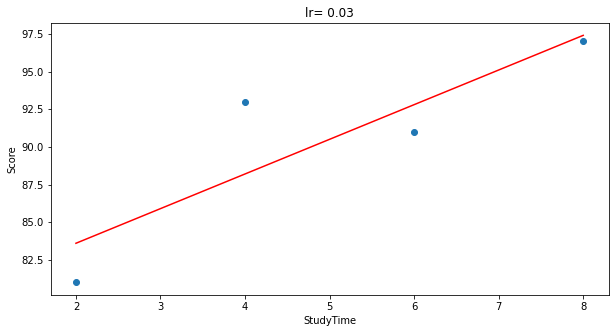

In [163]:
#학습률 0.03에서 반복을 아무리 실행시켜도 기울기와 절편이 2.3 79.0 에서 늘어나지 않음
y_pred = a * x_data + b
#y = ax + b
#(Example) y = 2.3x + 79

plt.figure(2,figsize=(10,5))
plt.title('lr= 0.03')
plt.scatter(x,y)
plt.plot([min(x_data), max(x_data)], [min(y_pred),max(y_pred)], c='r')
plt.xlabel('StudyTime') ; plt.ylabel('Score')
plt.show()